## 1000mm 65-61eV 50V <a class="anchor" id="section-2"></a>

Fitted parameters:
t0 = 12.82 ns      
E0 = 49.55 eV
s = 925.45 mm


,"Energy, eV",T 220
0,65,409.60
1,64,423.71
2,63,437.82
3,62,455.03
4,61,473.95
,"Energy, eV",W 220
0,65,3.80
1,64,4.73
2,63,3.97
3,62,3.97


,"Energy, eV","TOF, ns",Rtof,"TRET, ns",Rret
0,65,209.130400,0.39,414.981248,1.69
1,64,210.757899,0.40,429.032264,1.82
2,63,212.423995,0.40,444.661737,1.97
3,62,214.130239,0.41,462.191519,2.15
4,61,215.878270,0.41,482.043685,2.36


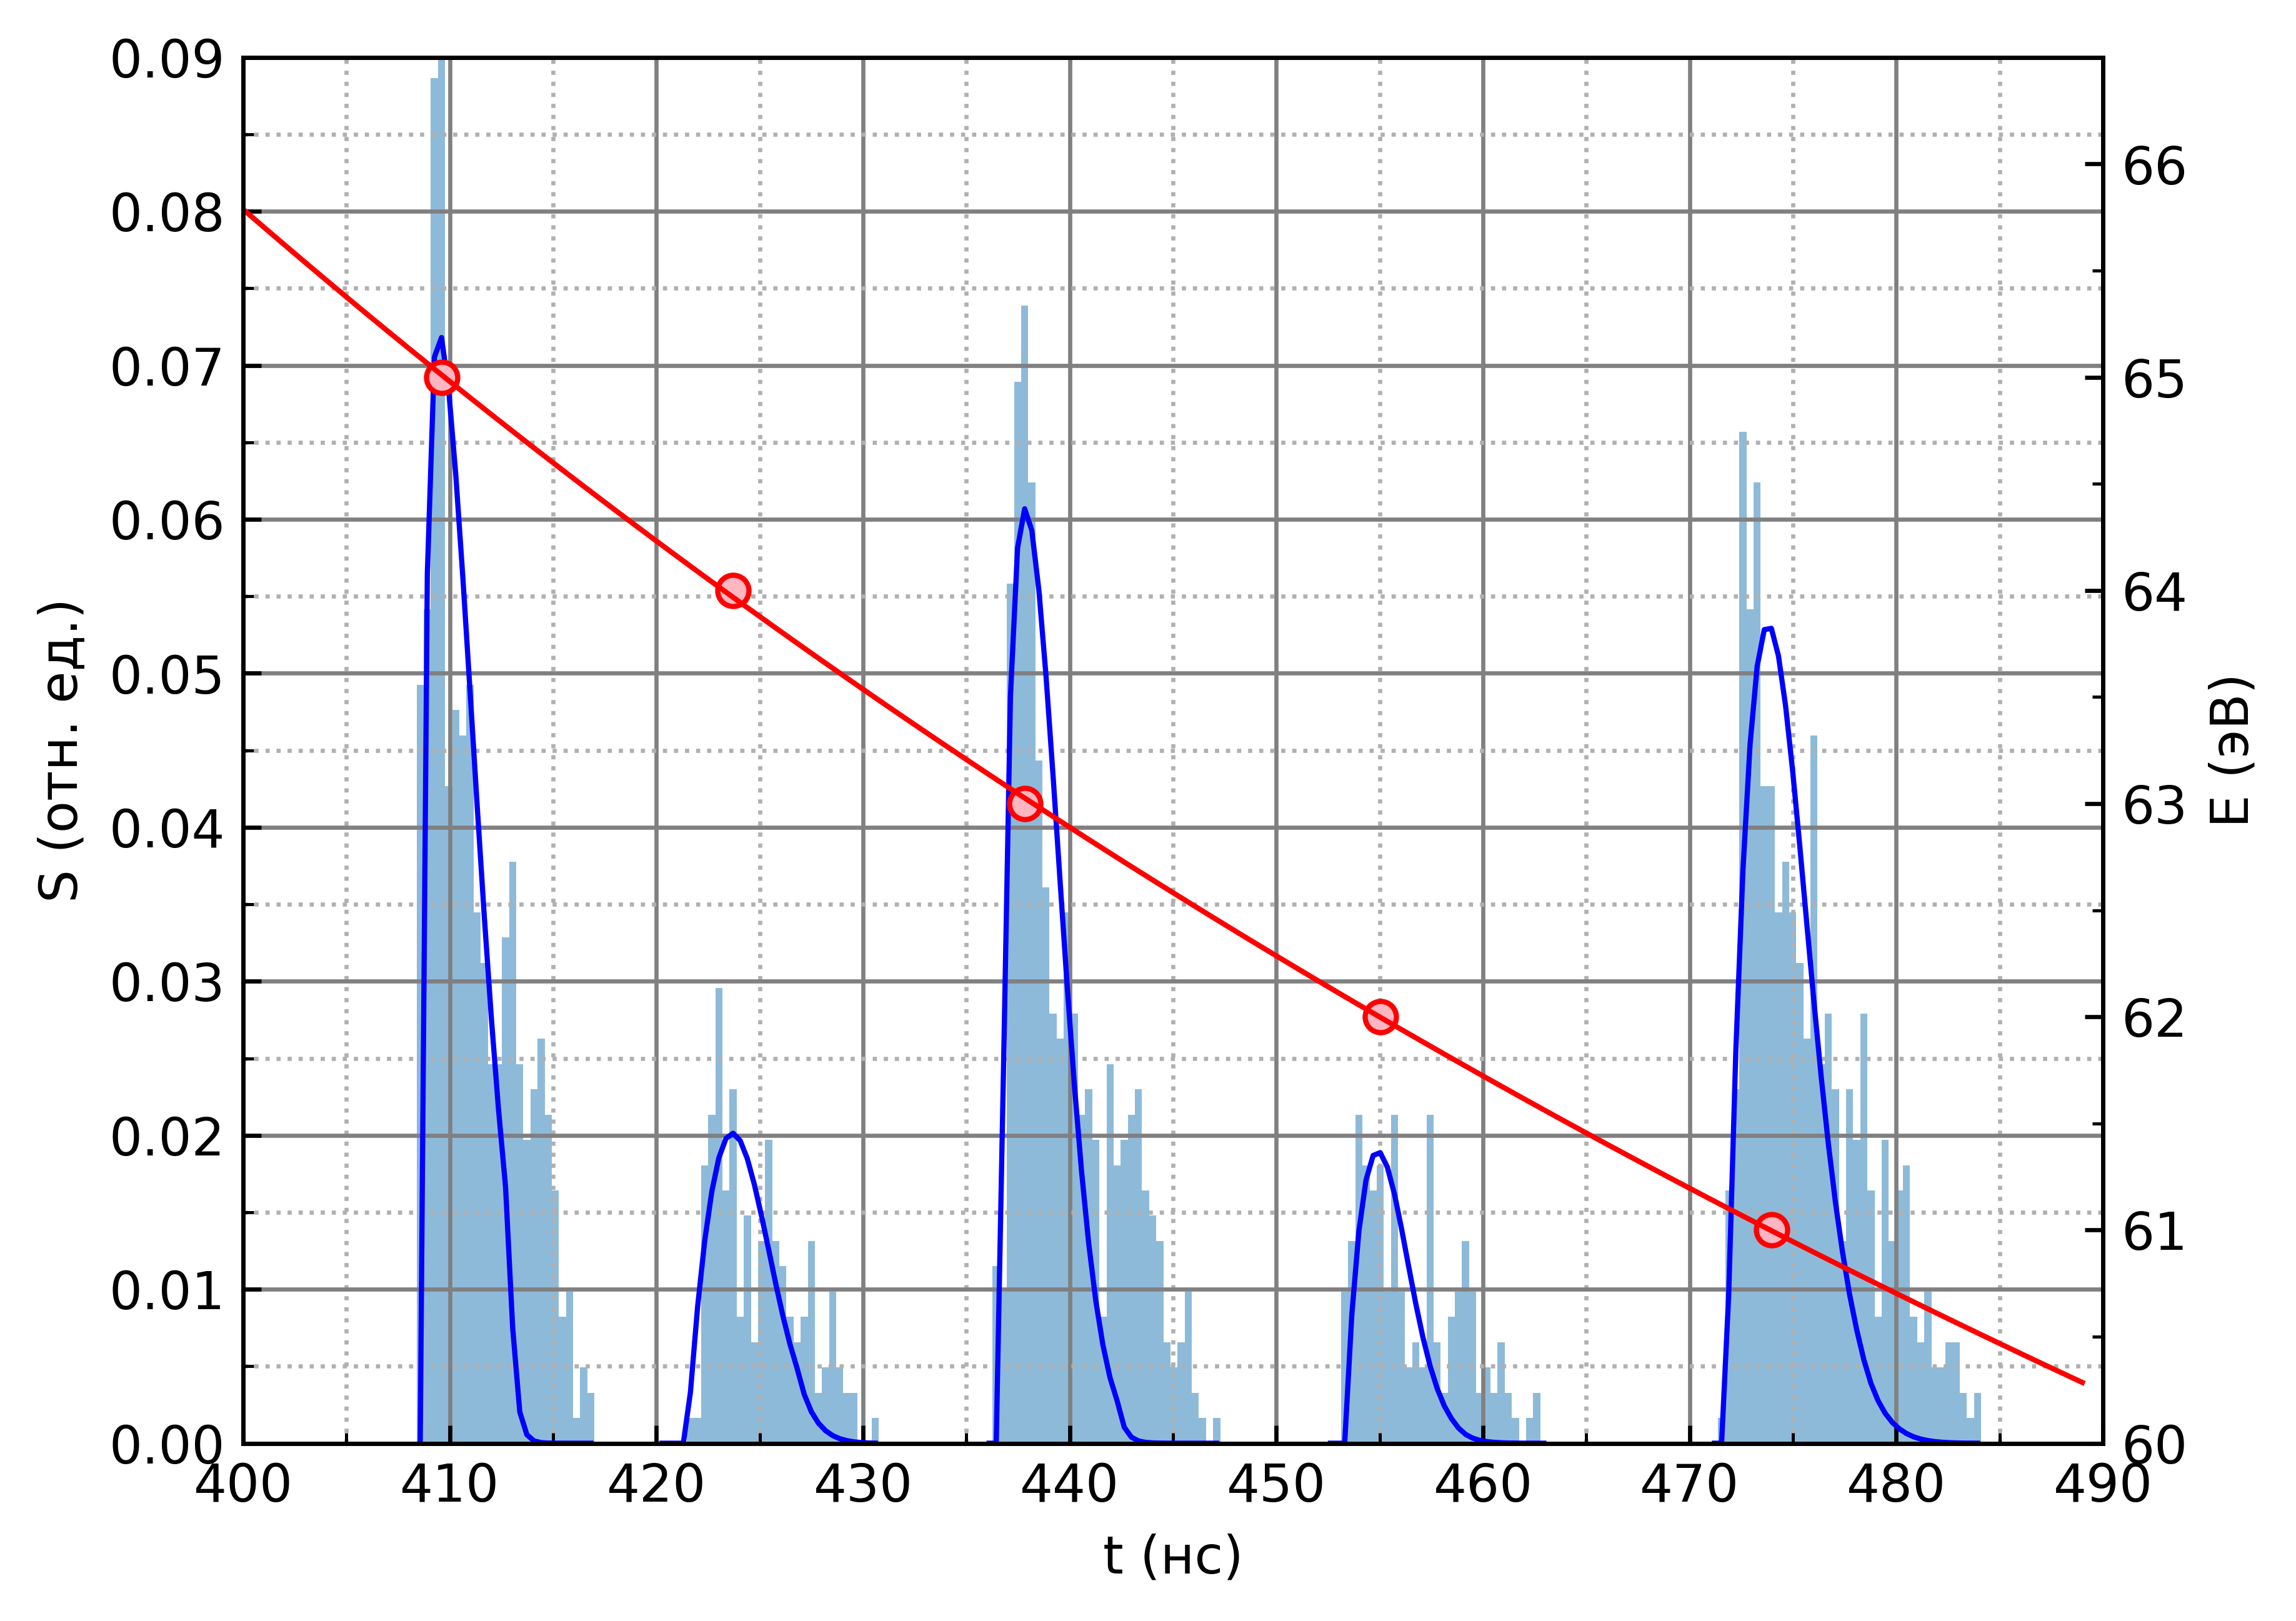

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import *
from scipy.optimize import curve_fit
from funcs import *

fig, ax = plt.subplots(dpi=600)

x_start=400
x_end = 490
x_interval = 10
y_start = 0
y_end = 0.09
y_interval = 0.01
decorate(ax, (x_start, x_end, x_interval), (y_start, y_end, y_interval),
          r"t (нс)", r"S (отн. ед.)", set=True)

data = read_file('./data/5p_ret50_good.txt', delimeter=None)[0]

times, sigmas, widths = [], [], []
energies = [65, 64, 63, 62, 61]
# straight_times = [409.18, 422.73, 437.28, 454.08, 472.58] # Real
straight_times = [410.00, 423.73, 438.68, 455.08, 473.58]
# bins = [(407.48, 419.48), (419.48, 433.04),
#          (433.04, 449.42), (449.42, 465.80), (465.80, 486.56)]
bins = [(407.48, 417.42), (420.56, 431.16), (436.12, 447.71), (452.67, 463.43), (471.21, 484.62)]

interval = bins[3]
M = 1
delta = (interval[0] - interval[1])/M
fivers = []
for N in range(220, 221):
    y, x, _ = plt.hist(data, N, alpha=0.5, density=True)
    x = (x[1:] + x[:-1])/2
    for dx in range(0, M):
        # straight_times[3] = interval[0] + dx*delta
        count = 0
        times_t, sigmas_t, widths_t = [], [], []

        for i, lim in enumerate(bins):
            start, stop = get_bins(lim, x)
            try:
                peak_x, sig, width = approximate(x[start:stop], y[start:stop], ax,
                                                (straight_times[i], 1, 0, 1, 1))
                times_t.append(peak_x)
                sigmas_t.append(sig)
                widths_t.append(width)
            except:
                continue
            count += 1

        if count == 5:
            times.append(times_t)
            sigmas.append(sigmas_t)
            widths.append(widths_t)
            fivers.append(N)
times, sigmas, widths = np.array(times), np.array(sigmas), np.array(widths)

xr = np.arange(x_start, x_end, 1)
params, _ = curve_fit(time_to_energy, times[0], energies, (0, 50, 1000))
print(f"Fitted parameters:\nt0 = {np.round(params[0]*1e9, 2)} ns\
      \nE0 = {np.round(params[1], 2)} eV\ns = {np.round(params[2], 2)} mm")

ax2 = ax.twinx()
ax2.scatter(times, energies, facecolors='#FFB6C1', edgecolors='r')
ax2.plot(xr, time_to_energy(xr, *params), lw=1, c='red')
decorate(ax2, (x_start, x_end, x_interval), (60, 66, 1),
          r"Time of flight (ns)", r"E (эВ)", set=False)
ax2.grid(visible=False, which='both')


d = {
    "Energy, eV": energies,
    # "t, ns": times,
    # "dt, ns": widths,
    # "dt/t, %": (widths+1)/times*100,
}
# print(fivers)
dr = pd.DataFrame(data=res(energies))
# df = pd.DataFrame(data=d)
# display_side_by_side(df, dr)
dT = pd.DataFrame(data=d)
dW = pd.DataFrame(data=d)
dR = pd.DataFrame(data=d)
dD = pd.DataFrame(data=d)
dT.set_index('Energy, eV')
dW.set_index('Energy, eV')
dR.set_index('Energy, eV')
dD.set_index('Energy, eV')
# print(times)
for i, n in enumerate(fivers):
    dT[f"T {n}"] = np.round(times[i], 2)
    dW[f"W {n}"] = np.round(widths[i]+1, 2)
    dR[f"R {n}"] = np.round((widths[i]+1)/times[i]*100, 2)
    dD[f"D {n}"] = np.std((widths[i]+1)/times[i]*100)
display_in_column(dT, dW, dR, dD)
display(dr)

## 1000mm 65-61eV 0V <a class="anchor" id="section-2"></a>

,"Energy, eV",T 46
0,65,209.95
1,64,211.25
2,63,213.11
3,62,214.78
4,61,216.63
,"Energy, eV",W 46
0,65,1.56
1,64,1.76
2,63,1.90
3,62,1.64


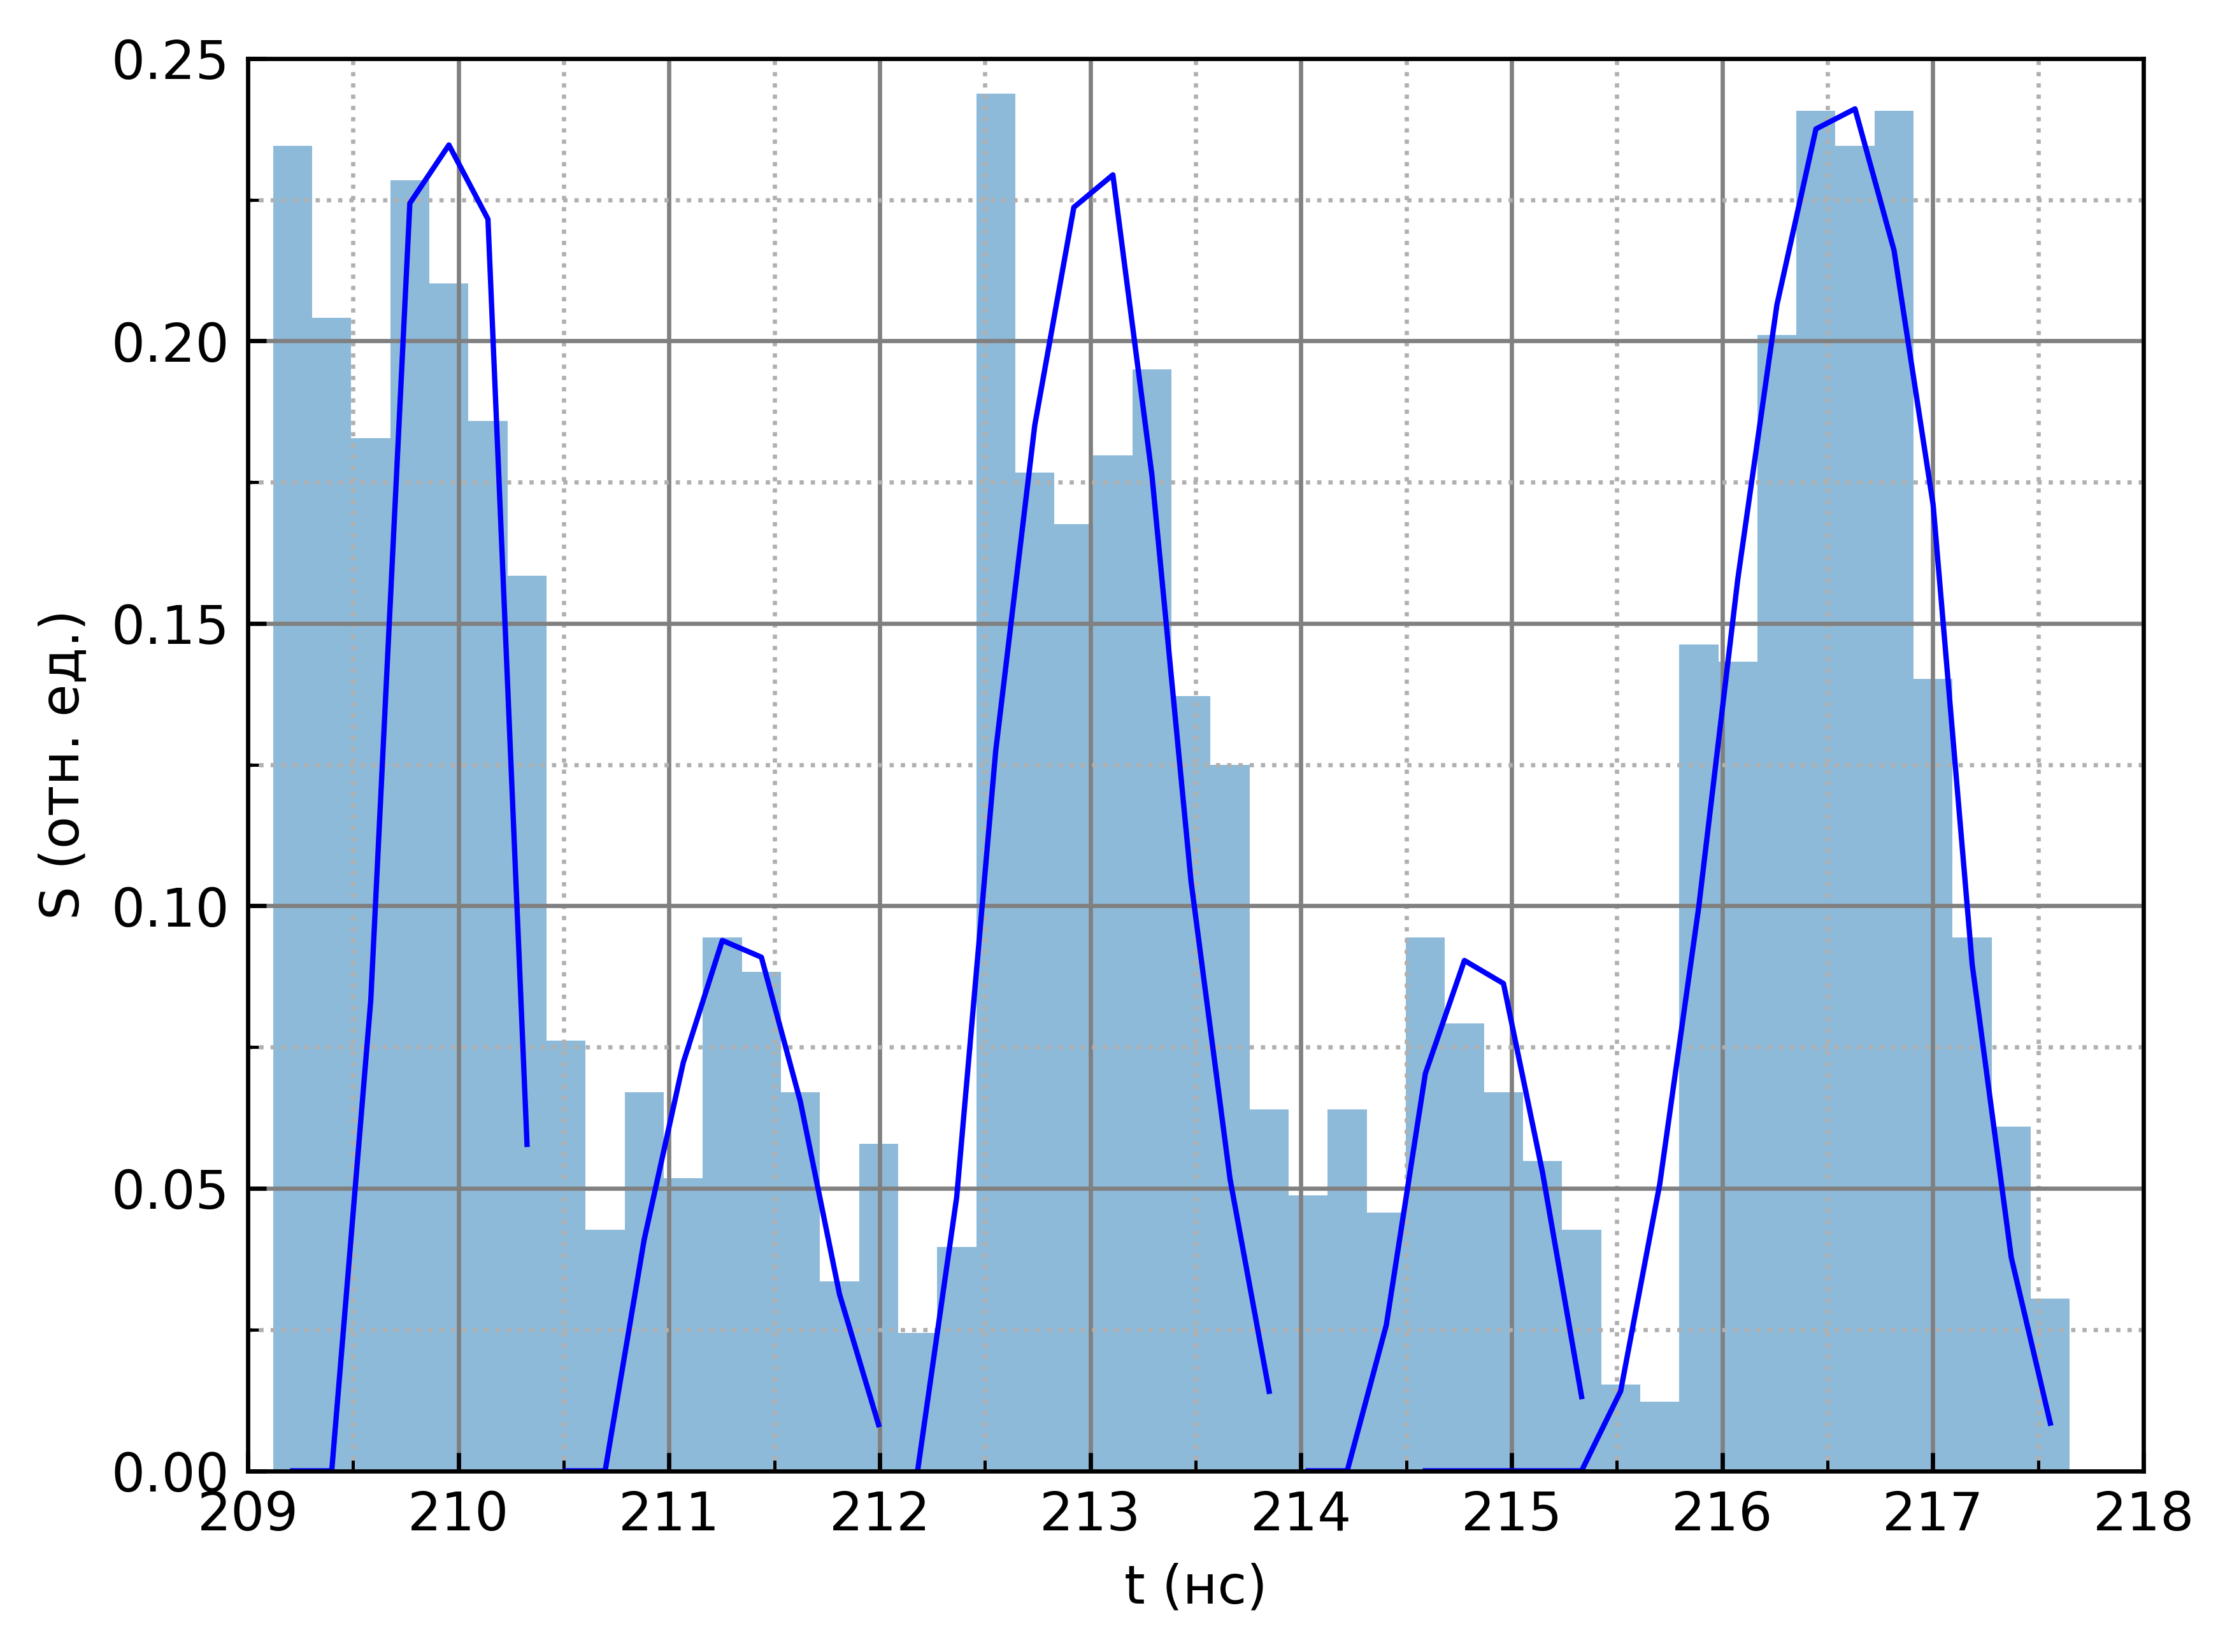

In [50]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import *
from scipy.optimize import curve_fit
from funcs import *

fig, ax = plt.subplots(dpi=600)

x_start = 209
x_end = 218
x_interval = 1
y_start = 0
y_end = 0.25
y_interval = 0.05
decorate(ax, (x_start, x_end, x_interval), (y_start, y_end, y_interval),
          r"t (нс)", r"S (отн. ед.)", set=True)

data = read_file('./data/5p_no_field.txt', delimeter=None)[0]

times, sigmas, widths = [], [], []
energies = [65, 64, 63, 62, 61]
straight_times = [209.92, 211.20, 212.55, 214.652, 216.39]
bins = [(209.049, 210.674), (210.674, 212.299),
        (212.299, 214.041), (214.041, 215.645), (214.595, 217.890)]

interval = bins[3]
M = 1
delta = (interval[0] - interval[1])/M
fivers = []
for N in range(46, 47):
    y, x, _ = plt.hist(data, N, alpha=0.5, density=True)
    x = (x[1:] + x[:-1])/2
    for dx in range(0, M):
        # straight_times[3] = interval[0] + dx*delta
        count = 0
        times_t, sigmas_t, widths_t = [], [], []

        for i, lim in enumerate(bins):
            start, stop = get_bins(lim, x)
            try:
                peak_x, sig, width = approximate(x[start:stop], y[start:stop], ax,
                                                (straight_times[i], 1, 0, 1, 1))
                times_t.append(peak_x)
                sigmas_t.append(sig)
                widths_t.append(width)
            except:
                continue
            count += 1

        if count == 5:
            times.append(times_t)
            sigmas.append(sigmas_t)
            widths.append(widths_t)
            fivers.append(N)
times, sigmas, widths = np.array(times), np.array(sigmas), np.array(widths)
d = {
    "Energy, eV": energies,
    # "t, ns": times,
    # "dt, ns": widths+1,
    # "dt/t, %": (widths+1)/times*100,
}
dT = pd.DataFrame(data=d)
dW = pd.DataFrame(data=d)
dR = pd.DataFrame(data=d)
dT.set_index('Energy, eV')
dW.set_index('Energy, eV')
dR.set_index('Energy, eV')
for i, n in enumerate(fivers):
    dT[f"T {n}"] = np.round(times[i], 2)
    dW[f"W {n}"] = np.round(widths[i]+1, 2)
    dR[f"R {n}"] = np.round((widths[i]+1)/times[i]*100, 2)
display_in_column(dT, dW, dR)

## Bundle's deviation <a class="anchor" id="section-5"></a>

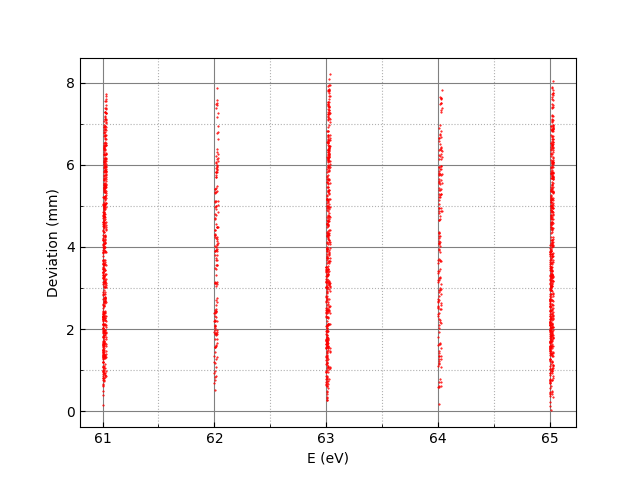

In [34]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from funcs import *

fig, ax = plt.subplots()
x_start = 9
x_end = 80
x_interval = 1
y_start = 0
y_end = 10
y_interval = 2
decorate(ax, (x_start, x_end, x_interval), (y_start, y_end, y_interval),
          r"E (eV)", r"Deviation (mm)", set=False)

x = np.arange(x_start, x_end, 1)
energies = [14.40, 13.08, 11.27, 9.95, 8.16, 6.84]
e, r = [], []
with open("./data/dist_coords_noret.txt", "r") as f_c:
    with open("./data/dist_energies_noret.txt", "r") as f_e:
        while True:
            s_c = f_c.readline()
            s_e = f_e.readline()
            if s_c == "" or s_e == "":
                break
            num_c = s_c.split()
            num_e = s_e.split()
            if round(float(num_c[2])) > 0: #== 1016 516
                r.append(np.sqrt(float(num_c[1]) ** 2 + float(num_c[3]) ** 2))
                e.append(float(num_e[1]))

ax.scatter(e, r, s=0.25, c="red", zorder=3)
# ax.vlines(energies, 0, 5, lw=1, color='b')

## Adiabaticity parameter graph <a class="anchor" id="section-5"></a>

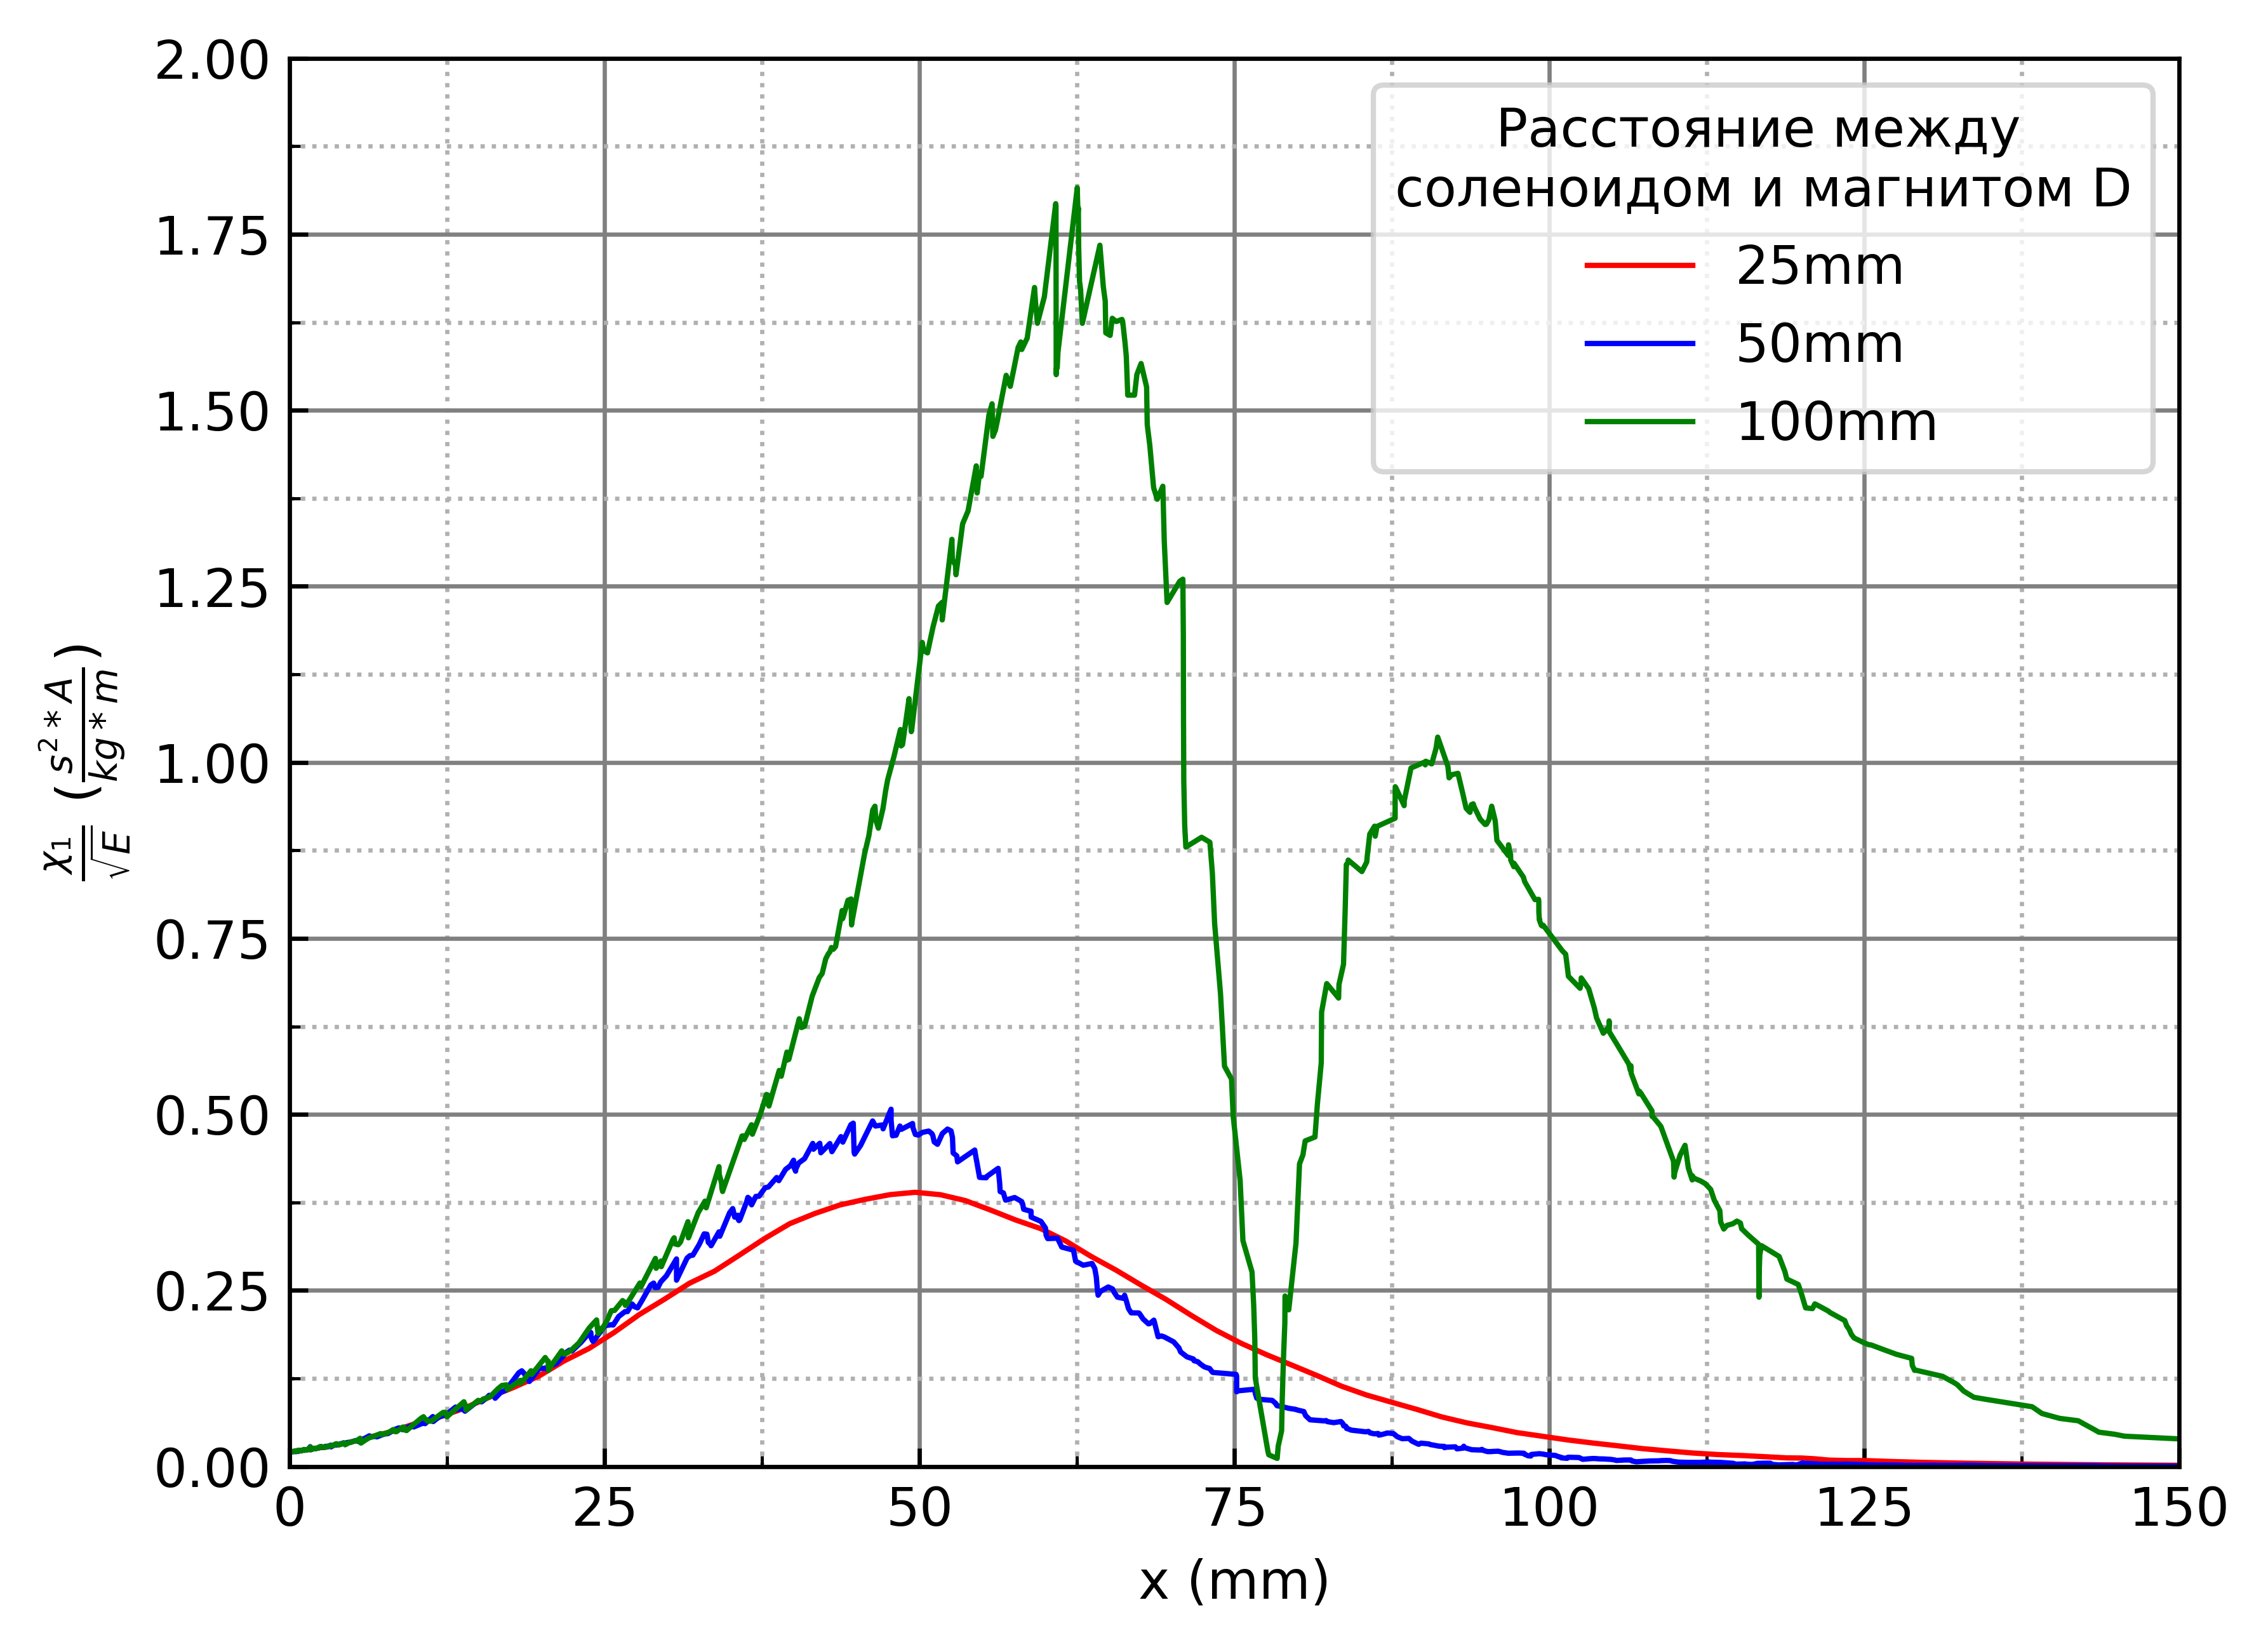

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
from funcs import *

fig, ax = plt.subplots(dpi=600)
x_start = 0
x_end = 150
x_interval = 25
y_start = 0
y_end = 2
y_interval = 0.25

x1, y1 = read_file('./data/adiabaticity_25mm.txt', delimeter=None)
x2, y2 = read_file('./data/adiabaticity_50mm.txt', delimeter=None)
x3, y3 = read_file('./data/adiabaticity_100mm.txt', delimeter=None)

ax.plot(x1, y1, c='r', lw=1, label='25mm')
ax.plot(x2, y2, c='b', lw=1, label='50mm')
ax.plot(x3, y3, c='g', lw=1, label='100mm')

decorate(ax, (x_start, x_end, x_interval), (y_start, y_end, y_interval),
    r"x (mm)",
    r"$\frac{\chi_1}{\sqrt{E}}~(\frac{s^2*A}{kg*m})$",
      set=True, legend = True)
leg = ax.legend(title="      Расстояние между\nсоленоидом и магнитом D")

## Flux graph <a class="anchor" id="section-5"></a>

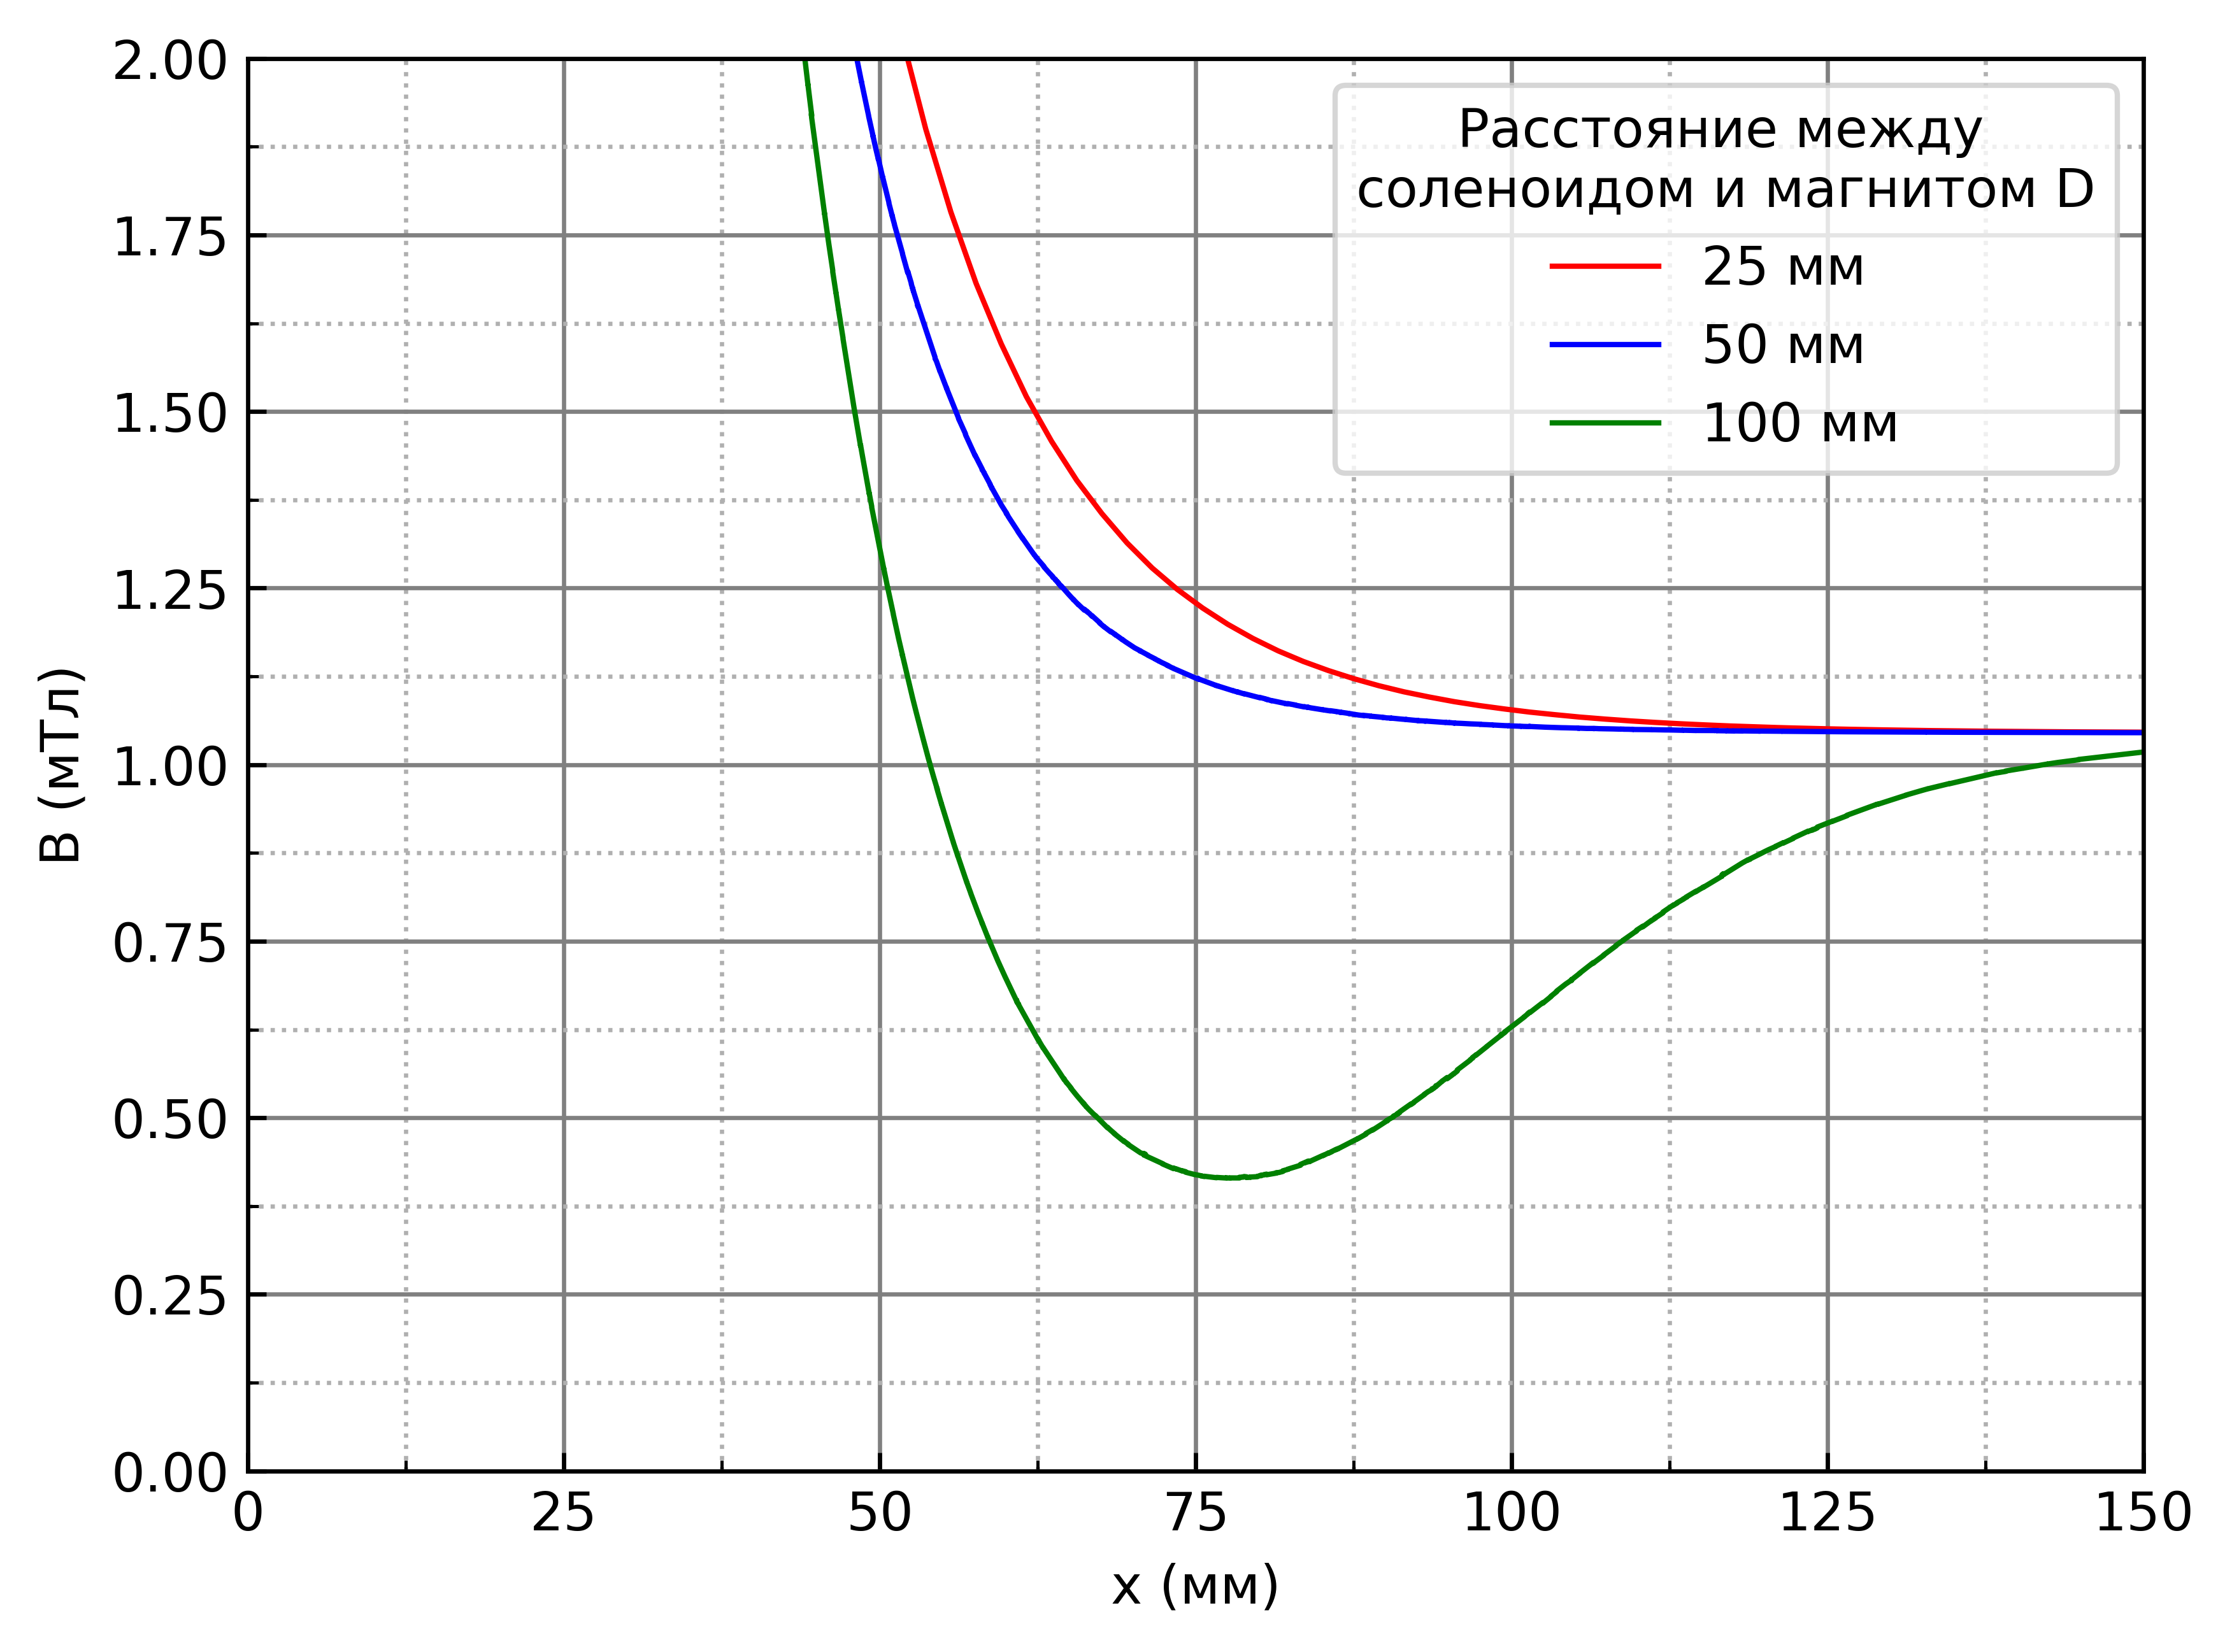

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
from funcs import *

fig, ax = plt.subplots(dpi=600)
x_start = 0
x_end = 150
x_interval = 25
y_start = 0
y_end = 2
y_interval = 0.25

x1, y1 = read_file('./data/flux_25mm.txt', delimeter=None)
x2, y2 = read_file('./data/flux_50mm.txt', delimeter=None)
x3, y3 = read_file('./data/flux_100mm.txt', delimeter=None)

ax.plot(x1, y1, c='r', lw=1, label='25 мм')
ax.plot(x2, y2, c='b', lw=1, label='50 мм')
ax.plot(x3, y3, c='g', lw=1, label='100 мм')

decorate(ax, (x_start, x_end, x_interval), (y_start, y_end, y_interval),
    r"x (мм)",
    r"B (мТл)",
      set=True, legend = True)
ax.legend(title="      Расстояние между\nсоленоидом и магнитом D")

## Resolution graph <a class="anchor" id="section-4"></a>

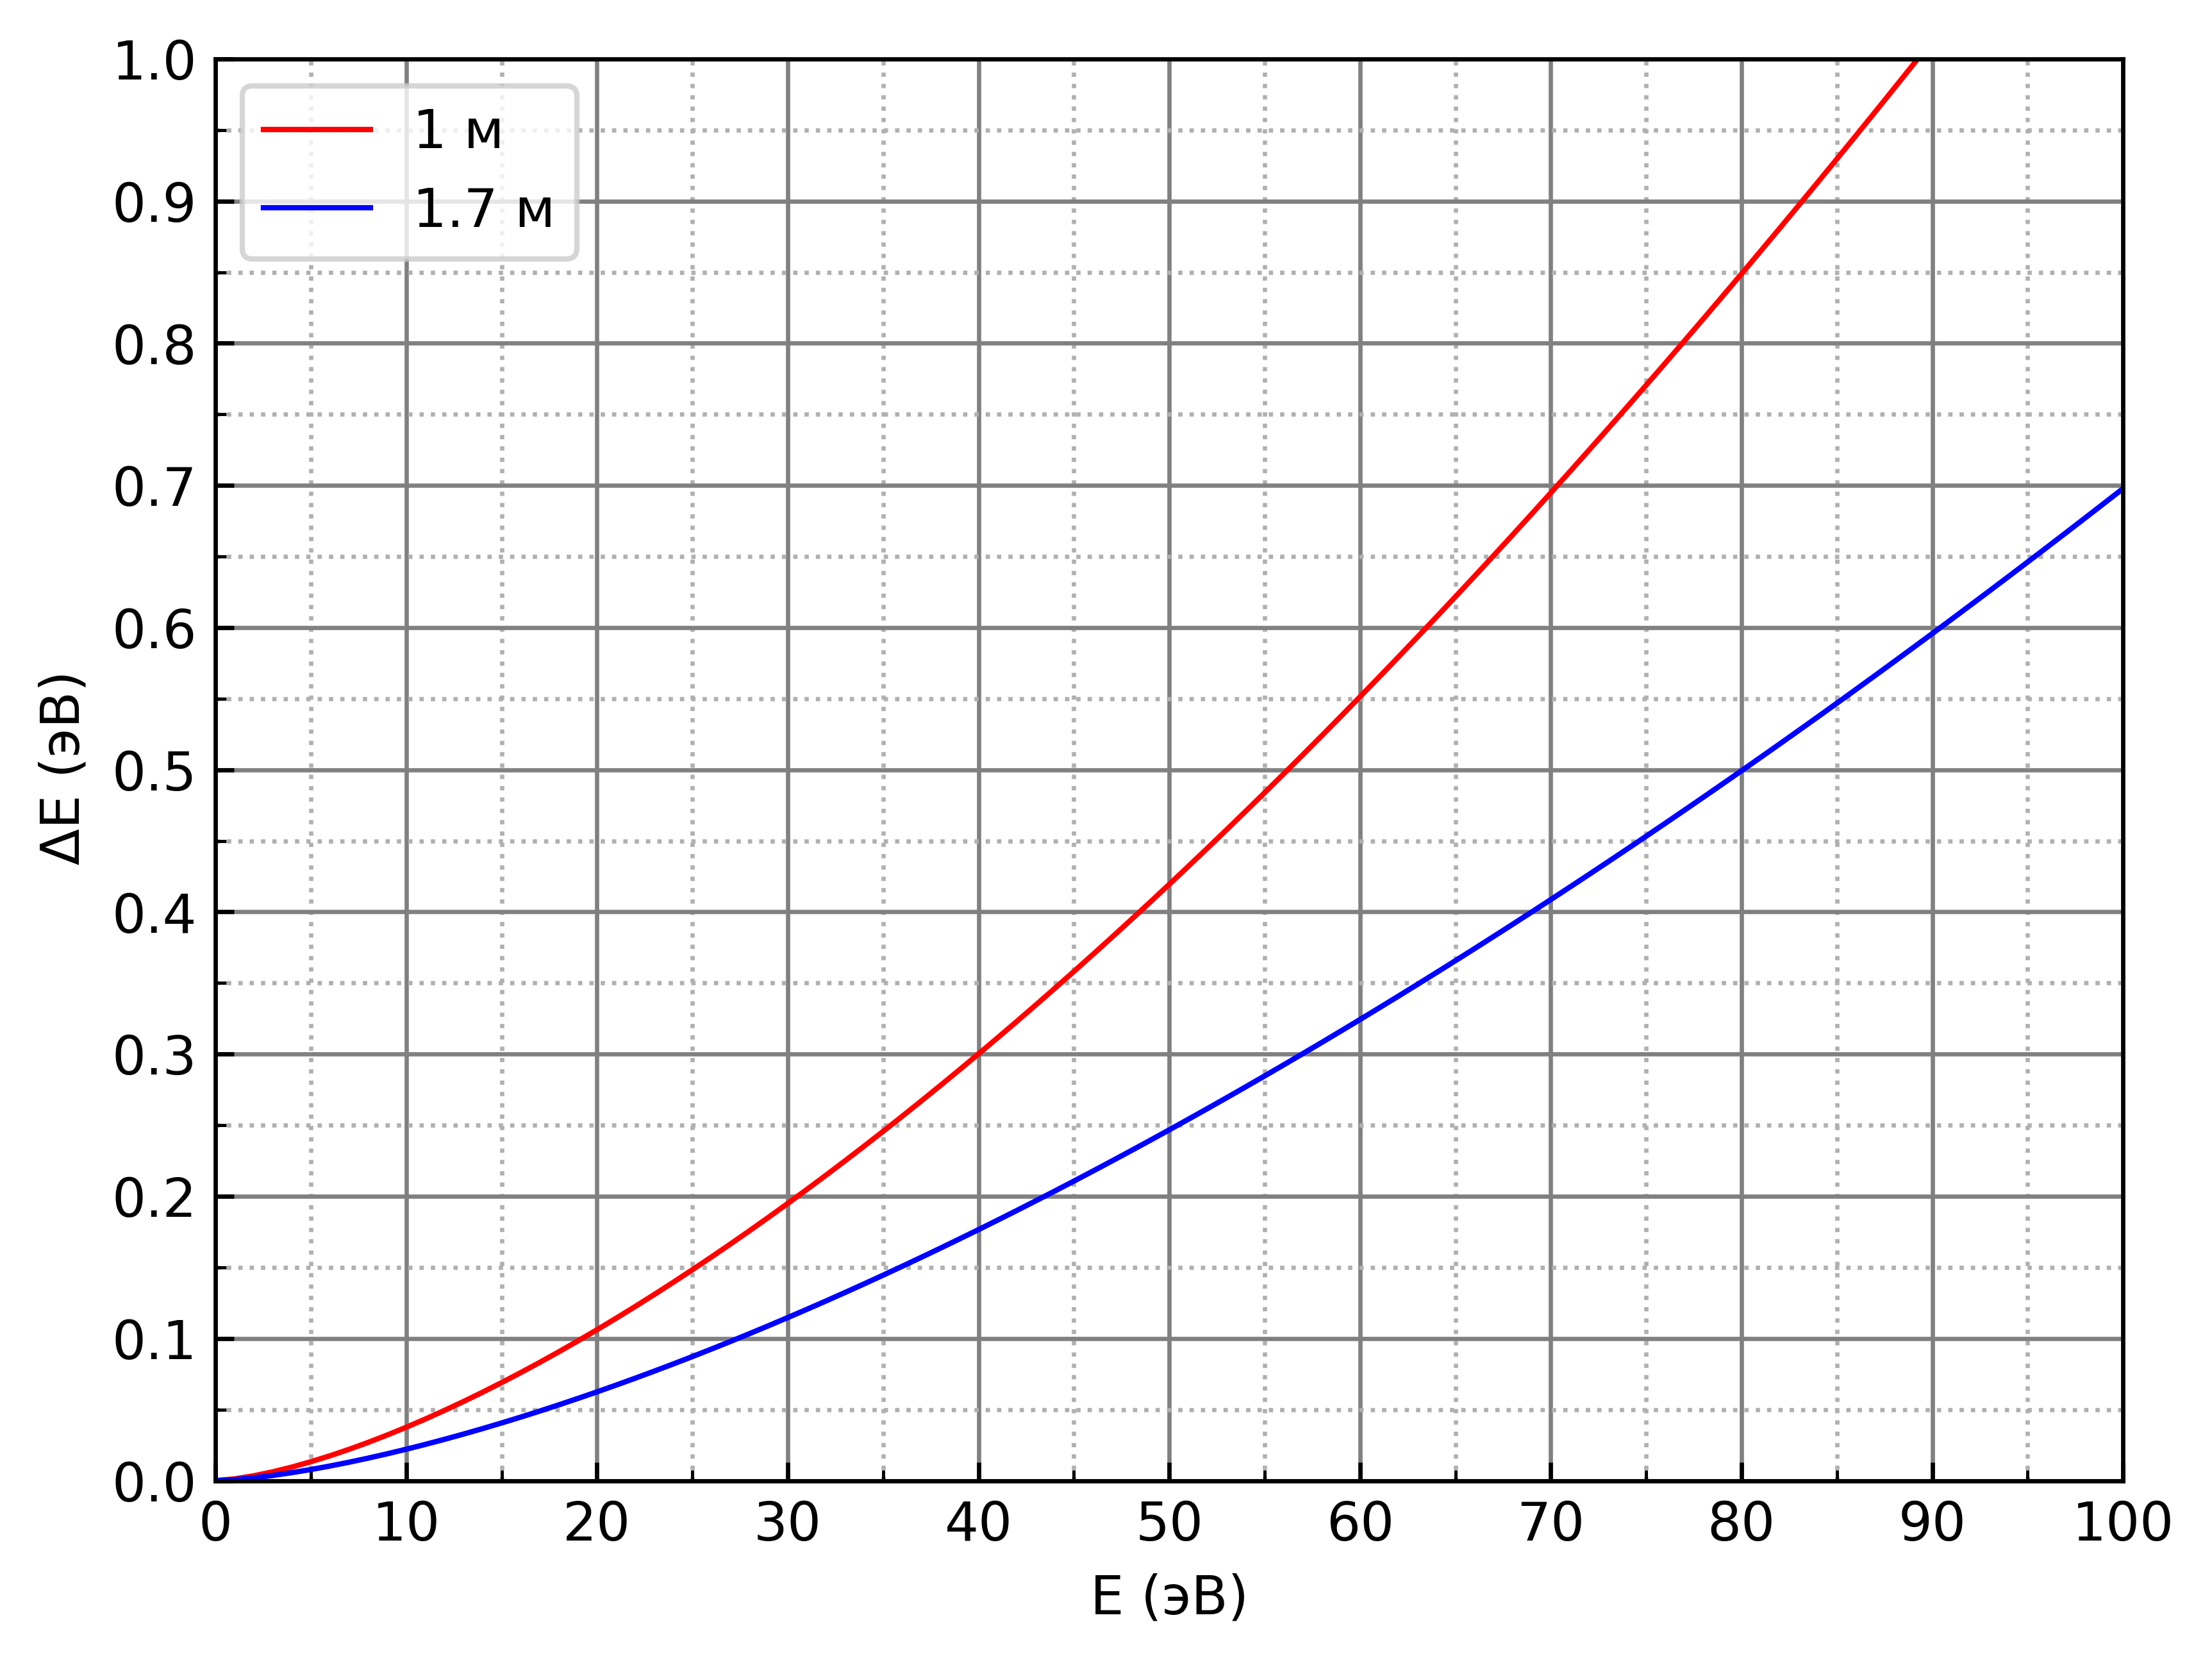

In [47]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from funcs import *

fig, ax = plt.subplots(dpi=600)
x_start = 0
x_end = 100
x_interval = 10
y_start = 0
y_end = 1
y_interval = 0.1

E = np.arange(x_start, x_end + 1, 1)
ax.plot(E, 2 * velocity(E) * 1e-9 * E / 1000, c="red", lw=1, label='1 м')
ax.plot(E, 2 * velocity(E) * 1e-9 * E / 1700, c="blue", lw=1, label='1.7 м')

decorate(ax, (x_start, x_end, x_interval), (y_start, y_end, y_interval),
          r"E (эВ)", r"$\Delta$E (эВ)", set=True, legend=True)